In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LABORATORIO DE ISOTERMAS DE ADSORCIÓN DE FREUNDLICH

En esta práctica de laboratorio se preprararon 77 soluciones de 500 mL de ácido acetico al 0.01 M (600 mg/L) a las cuales se les añadió 2, 4, 5.5, 6, 8, 10 y 12 gramos de carbón activado a cada muestra. De acuerdo a este montaje, el carbón activado será el adsorbente y el ácido acético será el sorbato.

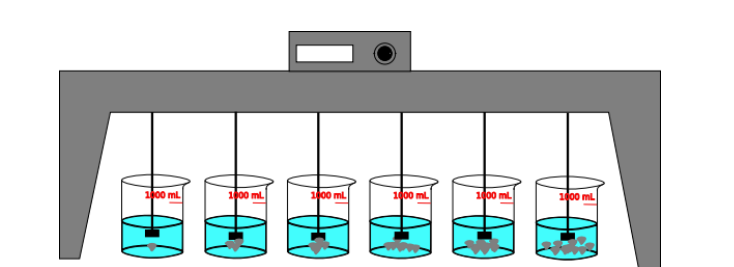

Gracias a las fuerzas de Van der Waals, las moléculas de ácido acético se adhieren a los macro y micro poros del adsorbente.

# RESULTADOS

In [2]:
Volumen = 0.5 #Litros

In [3]:
C0 = 600 #mg/L de ácido acético

Los siguientes resultados corresponden a la medición de la concentración remanente de ácido acético luego de pasar por el proceso de adsorción evaluado con diferentes masas de carbón activado.

In [4]:
Resultados = pd.DataFrame({"M":[2,4,5.5,6,8,10,12], 
                           "Vt":[35.5,22.7,19.5,18.2,17.8,18.2,17.7],
                           "Vm":[44.5,56,50,44,50,50,49]})
Resultados

,M,Vt,Vm
0,2.0,35.5,44.5
1,4.0,22.7,56.0
2,5.5,19.5,50.0
3,6.0,18.2,44.0
4,8.0,17.8,50.0
5,10.0,18.2,50.0
6,12.0,17.7,49.0


In [5]:
# M: masa del carbón activado en gramos
# Vt: volumen de titulante gastado en mL, NaOH 0.01 M
# Vm: volumen de muestra en mL empleado en la titulación

Para estimar la concentración remanente de ácido acético empleamos la siguiente ecuación:

$
C (mg/L) = \frac{V_t * C_t * 60000}{V_m}
$

Donde $C_t$ corresponde a la concentración del titulante que fue de 0.01M de NaOH

In [6]:
Resultados["Ct"] = (Resultados["Vt"]*0.01*60000)/ Resultados["Vm"]
Resultados

,M,Vt,Vm,Ct
0,2.0,35.5,44.5,478.651685
1,4.0,22.7,56.0,243.214286
2,5.5,19.5,50.0,234.000000
3,6.0,18.2,44.0,248.181818
4,8.0,17.8,50.0,213.600000
5,10.0,18.2,50.0,218.400000
6,12.0,17.7,49.0,216.734694


$
q(mg/g)= \frac{V}{M_i} * {C_0 - C}
$

In [7]:
Resultados["q"] = (Volumen/Resultados["M"]) * (C0-Resultados["Ct"])
Resultados

,M,Vt,Vm,Ct,q
0,2.0,35.5,44.5,478.651685,30.337079
1,4.0,22.7,56.0,243.214286,44.598214
2,5.5,19.5,50.0,234.000000,33.272727
3,6.0,18.2,44.0,248.181818,29.318182
4,8.0,17.8,50.0,213.600000,24.150000
5,10.0,18.2,50.0,218.400000,19.080000
6,12.0,17.7,49.0,216.734694,15.969388


Text(0.5, 0, 'C, mg/L')

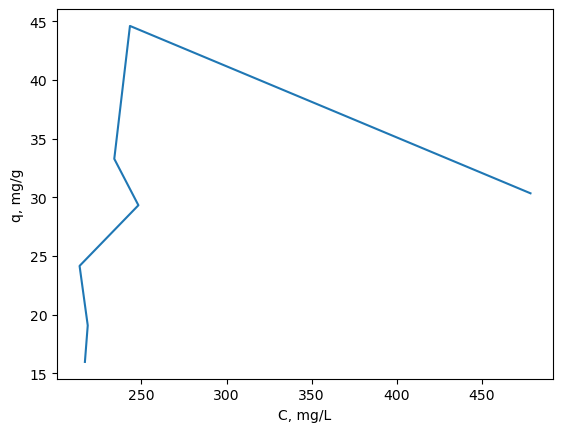

In [8]:
plt.plot(Resultados["Ct"], Resultados["q"])
plt.ylabel("q, mg/g")
plt.xlabel("C, mg/L")

(213.0, 250.0)

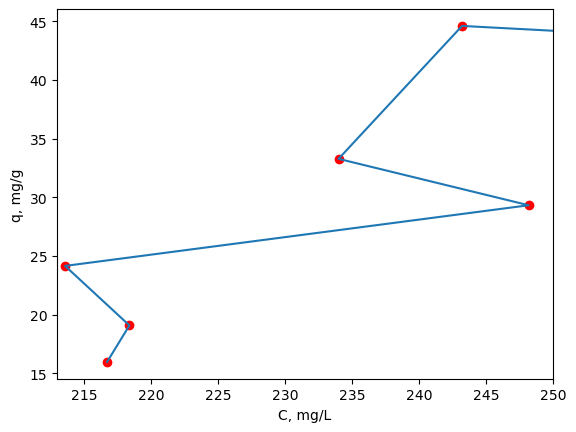

In [9]:
plt.plot(Resultados["Ct"], Resultados["q"])
plt.scatter(Resultados["Ct"], Resultados["q"], color="r")
plt.ylabel("q, mg/g")
plt.xlabel("C, mg/L")
plt.xlim((213,250))

Descartaremos el primer registro como atípico

In [10]:
Resultados.drop(0, inplace=True)


In [11]:
Resultados

,M,Vt,Vm,Ct,q
1,4.0,22.7,56.0,243.214286,44.598214
2,5.5,19.5,50.0,234.000000,33.272727
3,6.0,18.2,44.0,248.181818,29.318182
4,8.0,17.8,50.0,213.600000,24.150000
5,10.0,18.2,50.0,218.400000,19.080000
6,12.0,17.7,49.0,216.734694,15.969388


Ecuación de Freundlich

$
q = KC^{1/n}
$

$
Ln q = Ln K + 1/n Ln C
$

El modelo lineal de Freundlich lo ajustamos a un modelo de regresión lineal simple:

$
y = \beta_0 +  \beta_1 X + \epsilon
$

Donde, $\beta_0$ seria el LnK, $\beta_1$ $1/n$, $X$ LnC, y $\epsilon$ el error

$
\beta_1 = \frac{\sum_{1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{1}^{n} (x_i - \bar{x})^{2}}
$

$
\beta_1 = \frac{cov(x,y)}{var(x)}
$

$
\beta_0 = \bar{y}- \beta_1 * \bar{x}
$

In [12]:
Resultados["Lnq"] = np.log(Resultados["q"])
Resultados

,M,Vt,Vm,Ct,q,Lnq
1,4.0,22.7,56.0,243.214286,44.598214,3.797694
2,5.5,19.5,50.0,234.000000,33.272727,3.504738
3,6.0,18.2,44.0,248.181818,29.318182,3.378208
4,8.0,17.8,50.0,213.600000,24.150000,3.184284
5,10.0,18.2,50.0,218.400000,19.080000,2.948641
6,12.0,17.7,49.0,216.734694,15.969388,2.770674


In [13]:
Resultados["LnC"] = np.log(Resultados["Ct"])
Resultados

,M,Vt,Vm,Ct,q,Lnq,LnC
1,4.0,22.7,56.0,243.214286,44.598214,3.797694,5.493943
2,5.5,19.5,50.0,234.000000,33.272727,3.504738,5.455321
3,6.0,18.2,44.0,248.181818,29.318182,3.378208,5.514162
4,8.0,17.8,50.0,213.600000,24.150000,3.184284,5.364105
5,10.0,18.2,50.0,218.400000,19.080000,2.948641,5.386328
6,12.0,17.7,49.0,216.734694,15.969388,2.770674,5.378674


In [14]:
yprom = Resultados["Lnq"].mean()
yprom

3.264039735708403

In [15]:
xprom = Resultados["LnC"].mean()
xprom

5.432088827891463

In [16]:
covXY = ((Resultados["LnC"]- xprom)*(Resultados["Lnq"]-yprom)).sum()
covXY

0.09417872049286367

In [17]:
varX = ((Resultados["LnC"]- xprom)**2).sum()
varX

0.020670568036109557

In [18]:
Beta1 = covXY/varX
Beta1 # 1/n

4.556174766380016

In [19]:
Beta0 = yprom - Beta1* xprom
Beta0 #LnK

-21.48550631066548

In [20]:
qmodel = Beta0 + Beta1*Resultados["LnC"]

In [21]:
Error_medio = (Resultados["Lnq"]-qmodel).mean()
Error_medio

-4.588921835117314e-15

$
R^{2} = \frac{(COV(X,Y))^2}{Var(X)*Var(Y)}
$

$
R^2 = \frac{\sum_{1}^{n} (\hat{y}_i- \bar{y})^2}{\sum_{1}^{n} (y_i - \bar{y})^2}
$

In [22]:
R2 = ((qmodel-yprom)**2).sum() / ((Resultados["Lnq"]-yprom)**2).sum()
R2

0.6086412349275655

Text(5.4, 3.7, 'Lnq = -21.486 + 4.556* LnC')

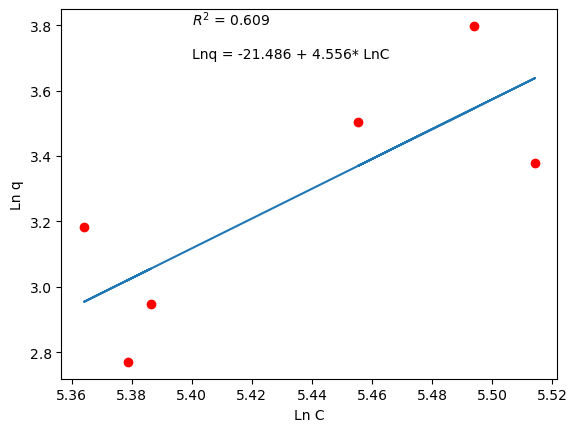

In [23]:
plt.plot(Resultados["LnC"],qmodel)
plt.scatter(Resultados["LnC"], Resultados["Lnq"], color="r")
plt.xlabel("Ln C")
plt.ylabel("Ln q")
plt.annotate("$R^2$ = 0.609",xy =(5.4,3.8))
plt.annotate("Lnq = -21.486 + 4.556* LnC", xy =(5.4,3.7))

In [24]:
K = np.exp(Beta0)
K

4.666198055726279e-10

In [25]:
n = 1/Beta1
n

0.21948236212952005

In [26]:
IsotermaQ = K * (Resultados["Ct"].sort_values())**(1/n)

Text(215, 40, 'q = 4.666E-10 * $C^{1/0.219}$ ')

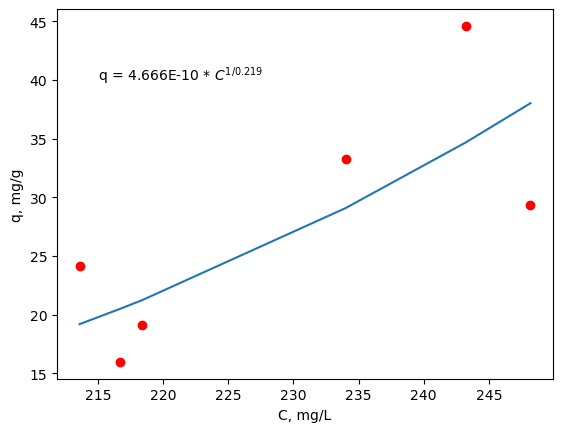

In [27]:
plt.plot(Resultados["Ct"].sort_values(), IsotermaQ)
plt.scatter(Resultados["Ct"], Resultados["q"], color="r")
plt.xlabel("C, mg/L")
plt.ylabel("q, mg/g")
plt.annotate("q = 4.666E-10 * $C^{1/0.219}$ ", xy=(215,40))